In [3]:
from google.colab import files
files.upload()

Saving 13_sept12_86.jpg to 13_sept12_86.jpg


{'13_sept12_86.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x06\x04\x04\x04\x05\x04\x06\x05\x05\x06\t\x06\x05\x06\t\x0b\x08\x06\x06\x08\x0b\x0c\n\n\x0b\n\n\x0c\x10\x0c\x0c\x0c\x0c\x0c\x0c\x10\x0c\x0e\x0f\x10\x0f\x0e\x0c\x13\x13\x14\x14\x13\x13\x1c\x1b\x1b\x1b\x1c          \xff\xdb\x00C\x01\x07\x07\x07\r\x0c\r\x18\x10\x10\x18\x1a\x15\x11\x15\x1a                                                 \xff\xc2\x00\x11\x08\x01:\x01\xdb\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x06\x07\x03\x04\x05\x02\x01\x00\x08\xff\xc4\x00\x1b\x01\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x05\x00\x02\x03\x01\x06\x07\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\x1fi\x8d<\xbb\xf4\x9eI\xec\x93\xdf\x9e\xf2u\xd9=\xf95\xb9\xcc\xef<\x9ds\x9fvu$T\x9fW\xb2N\xc3nw9/y\xe4\xecRs^\xf9\xce\xf39\xc4\xect\xef\xd2Inu\xde}\'ry$|\x9fI\xf4\x9fI\xe79\xf7{5\xb9\xef{\xe4\x90\

In [0]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *

In [5]:
!ls

13_sept12_86.jpg  sample_data


In [0]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

(314, 475, 3)


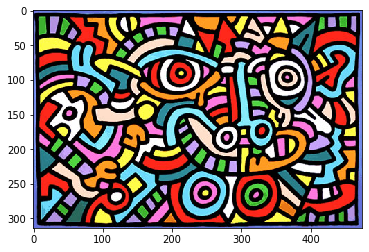

In [7]:
pic = plt.imread('13_sept12_86.jpg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)

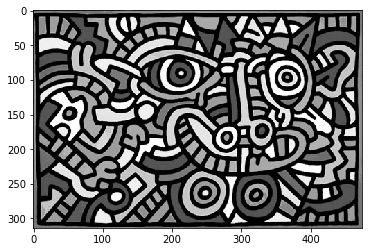

In [8]:
gray = rgb2gray(pic)
plt.imshow(gray, cmap='gray')

**Image Thresholding**

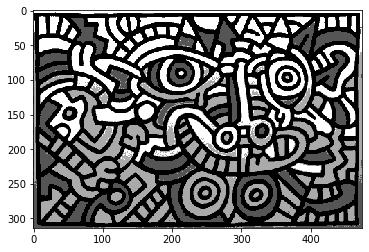

In [9]:

gray = rgb2gray(pic)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

In [10]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(149150, 3)

**K-Means**

In [0]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

In [12]:
kmeans.cluster_centers_

array([[0.334982, 0.515917, 0.541344],
       [0.778443, 0.787213, 0.919937],
       [0.037911, 0.026065, 0.028627],
       [0.919875, 0.172885, 0.106127],
       [0.972399, 0.780392, 0.217605]])

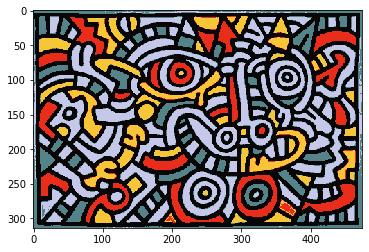

In [13]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

**Histogram of Colors**

In [0]:
from PIL import Image
im = Image.open("13_sept12_86.jpg")

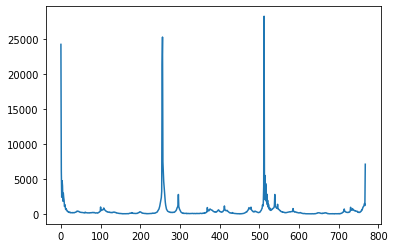

In [15]:
plt.plot(list(range(0, 768)), im.histogram())

In [16]:
np.argmax(np.array(im.histogram()))

512

In [17]:
np.array(im.histogram()).argsort()[::-1][:5]

array([512, 256,   0, 255, 257])

In [18]:
pic.shape

(314, 475, 3)

Shape Detection

In [0]:

k = tensor([
    [0.  ,-5/3,1],
    [-5/3,-5/3,1],
    [1.  ,1   ,1],
]).expand(1,3,3,3)/6

In [0]:
im = open_image('13_sept12_86.jpg').data
img = cv2.imread('13_sept12_86.jpg')

In [0]:
edge = F.conv2d(im[None], k)

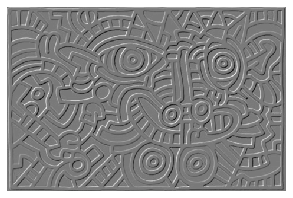

In [22]:
show_image(edge[0], figsize=(5,5));

In [23]:
edge.shape

torch.Size([1, 1, 312, 473])

**Seperating the colors**

In [0]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [0]:
lower = np.array([30,150,50])
upper = np.array([255,255,180])

In [0]:
mask = cv2.inRange(hsv, lower, upper)
res = cv2.bitwise_and(img,img, mask= mask)

In [0]:
from google.colab.patches import cv2_imshow

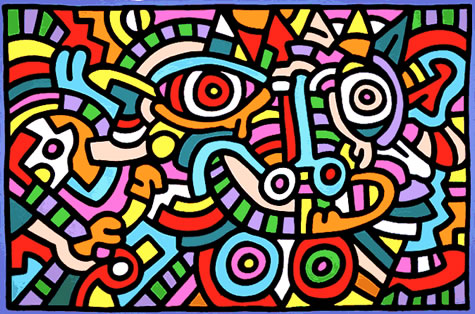

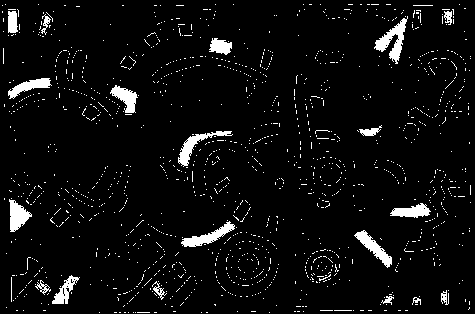

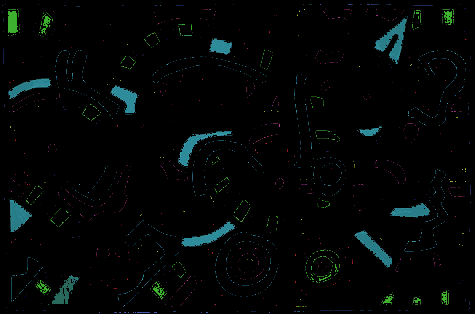

In [28]:
cv2_imshow(img)
cv2_imshow(mask)
cv2_imshow(res)

In [0]:
lower = np.array([1,190,200])
upper = np.array([18,255,255])

In [0]:
mask = cv2.inRange(hsv, lower, upper)
res = cv2.bitwise_and(img,img, mask= mask)

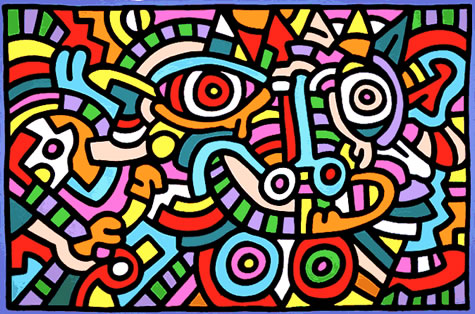

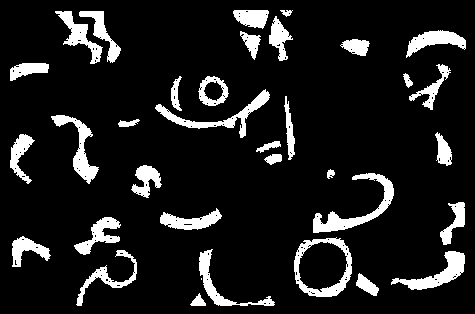

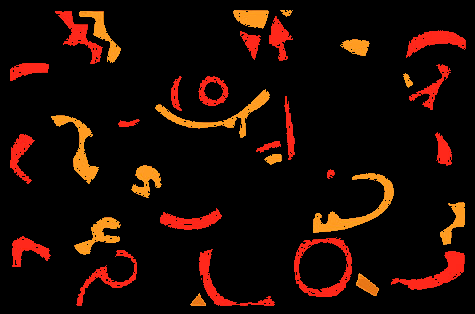

In [31]:
cv2_imshow(img)
cv2_imshow(mask)
cv2_imshow(res)

In [0]:
lower = np.array([0,0,200])
upper = np.array([145,60,255])

In [0]:
mask = cv2.inRange(hsv, lower, upper)
res = cv2.bitwise_and(img,img, mask= mask)

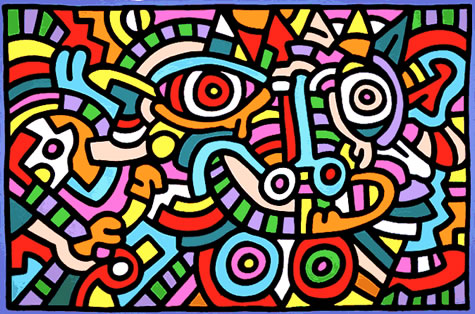

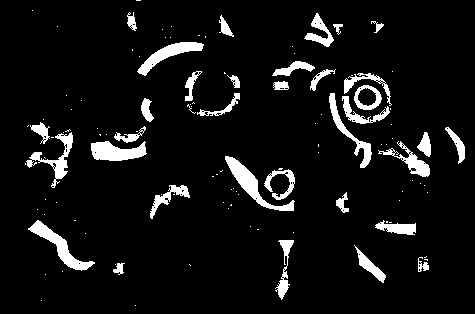

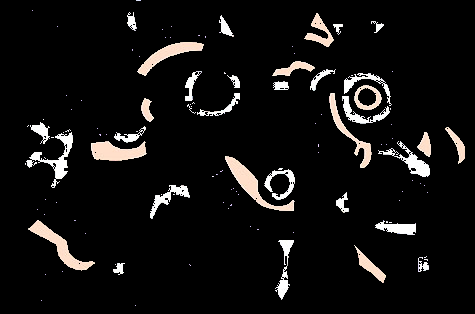

In [34]:
cv2_imshow(img)
cv2_imshow(mask)
cv2_imshow(res)

In [0]:
lower = np.array([15,0,0])
upper = np.array([36, 255, 255])

In [0]:
mask = cv2.inRange(hsv, lower, upper)
res = cv2.bitwise_and(img,img, mask= mask)

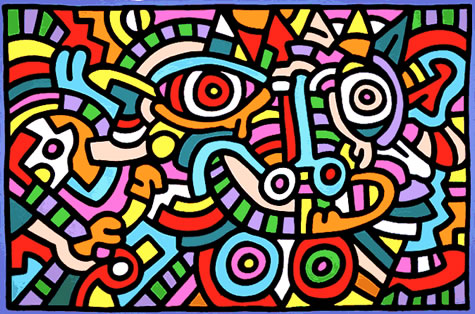

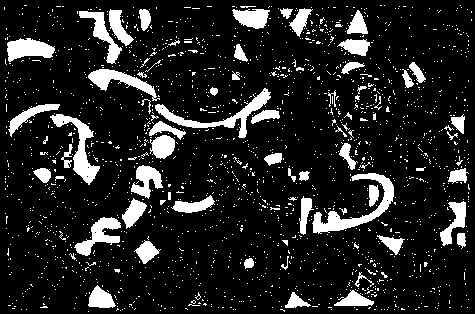

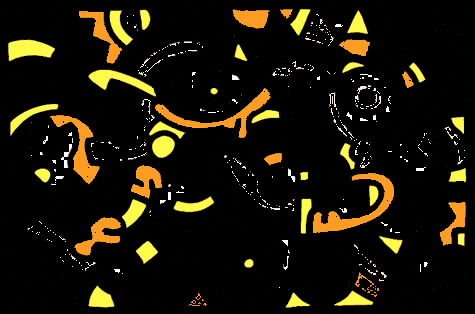

In [37]:
cv2_imshow(img)
cv2_imshow(mask)
cv2_imshow(res)